In [75]:
# Read Data
import numpy as np                    # Linear Algebra (calculate the mean and standard deviation)
import pandas as pd                   # manipulate data, data processing, load csv file I/O (e.g. pd.read_csv)

# Visualization
import matplotlib.pyplot as plt       # Visualization using matplotlib
%matplotlib inline
import seaborn as sns                 # Visualization using seaborn

# style
plt.style.use("fivethirtyeight")      # Set Graphs Background style using matplotlib
sns.set_style("darkgrid")             # Set Graphs Background style using seaborn

# ML model building; Pre Processing & Evaluation
from sklearn.model_selection import train_test_split                     # split  data into training and testing sets
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor                       # this will make a Random Forest Regression
import xgboost
from xgboost import XGBRegressor                                         # XGBoost Regressor
from sklearn.preprocessing import StandardScaler                         # Standard Scalar
import warnings                       
warnings.filterwarnings("ignore")     # Ignore Warnings

In [76]:
train = pd.read_csv("train_0irEZ2H.csv")
test = pd.read_csv("test_nfaJ3J5.csv")

In [77]:
display(train.head())
display(test.head())

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,212645,16/07/13,8091,216418,108.3000,108.3000,0,0
1,212646,16/07/13,8091,216419,109.0125,109.0125,0,0
2,212647,16/07/13,8091,216425,133.9500,133.9500,0,0
3,212648,16/07/13,8091,216233,133.9500,133.9500,0,0
4,212649,16/07/13,8091,217390,176.7000,176.7000,0,0


In [78]:
# checking dimension (num of rows and columns) of dataset
print("Training data shape (Rows, Columns):",train.shape)
print("Test data shape (Rows, Columns):",test.shape)

Training data shape (Rows, Columns): (150150, 9)
Test data shape (Rows, Columns): (13860, 8)


In [79]:
train_original=train.copy() 
test_original=test.copy()

In [80]:

# check dataframe structure like columns and its counts, datatypes & Null Values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
record_ID          150150 non-null int64
week               150150 non-null object
store_id           150150 non-null int64
sku_id             150150 non-null int64
total_price        150149 non-null float64
base_price         150150 non-null float64
is_featured_sku    150150 non-null int64
is_display_sku     150150 non-null int64
units_sold         150150 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [81]:
display(test.info())
display(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13860 entries, 0 to 13859
Data columns (total 8 columns):
record_ID          13860 non-null int64
week               13860 non-null object
store_id           13860 non-null int64
sku_id             13860 non-null int64
total_price        13860 non-null float64
base_price         13860 non-null float64
is_featured_sku    13860 non-null int64
is_display_sku     13860 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 866.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
record_ID          150150 non-null int64
week               150150 non-null object
store_id           150150 non-null int64
sku_id             150150 non-null int64
total_price        150149 non-null float64
base_price         150150 non-null float64
is_featured_sku    150150 non-null int64
is_display_sku     150150 non-null int64
units_sold         150150 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


None

In [82]:
#we get that all are numeric features.
#now Exploratory data analyss to get info hidden in rows and columns

In [83]:
# Listing Number of missing values by feature column wise
train.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [84]:
#only one null value in totl_price

In [85]:
# Listing Number of missing values by feature column wise
test.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
dtype: int64

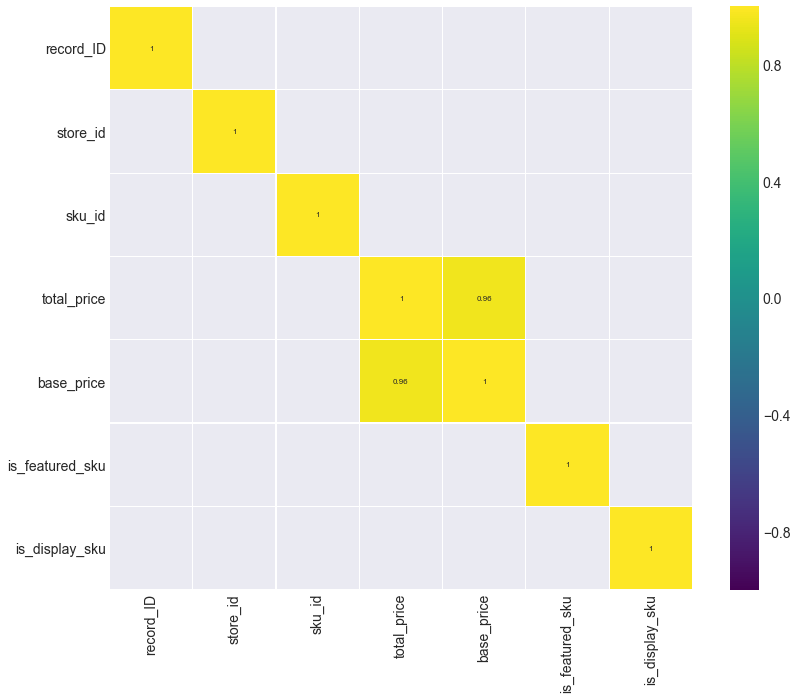

In [86]:
#exploring correlation in features
corr = train.drop('units_sold', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [87]:
# descriptive statistics
train.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150150.000000,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,254761.132468,206.626751,219.425927,0.095611,0.133200,51.674206
std,61386.037861,615.591445,85547.306447,103.308516,110.961712,0.294058,0.339792,60.207904
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.250000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.500000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.750000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


In [88]:
#filling the missing value with mean
train['total_price'] = train['total_price'].fillna(train['total_price'].mean())  # float

In [89]:
#model building

In [90]:
train.drop(columns=['record_ID','week'], inplace=True, axis=1)
test.drop(columns=['record_ID','week'], inplace=True, axis=1)

In [91]:
# Independant variable
X = train.iloc[:,:-1]             # All rows & columns exclude Target features

# Dependant variable
y = train['units_sold']           # Only target feature

In [92]:
# split  data into training and testing sets of 80:20 ratio
# 20% of test size selected
# random_state is random seed
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=4)

In [93]:
# shape of X & Y test / train
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(100600, 6) (49550, 6) (100600,) (49550,)


In [94]:
#using Random forest regressor

In [95]:
sc = StandardScaler()
X_train_Scaled = sc.fit_transform(X_train)
X_test_Scaled = sc.transform(X_test)

In [96]:
rf = RandomForestRegressor()
rf.fit(X_train_Scaled, y_train)

RandomForestRegressor()

In [97]:
y_pred = rf.predict(X_test_Scaled)

In [98]:
print("Train Score {:.2f} & Test Score {:.2f}".format(rf.score(X_train_Scaled, y_train),rf.score(X_test_Scaled, y_test)))


Train Score 0.93 & Test Score 0.72


In [99]:
y_pred_test = rf.predict(test)

In [100]:
y_pred_test.shape

(13860,)

In [101]:
y_pred_test

array([5.82880642, 5.82880642, 5.82880642, ..., 5.82880642, 5.82880642,
       5.82880642])

In [102]:
#XGBOOST

In [103]:
xgb = xgboost.XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [104]:
# predicting X_test
y_pred_xgb = xgb.predict(X_test)

In [105]:
y_pred_xgb.shape

(49550,)

In [106]:
y_pred_xgb

array([28.056446, 14.544729, 20.357927, ..., 17.239866, 47.899292,
       43.879463], dtype=float32)

In [107]:
print("Train Score {:.2f} & Test Score {:.2f}".format(xgb.score(X_train,y_train),xgb.score(X_test,y_test)))

Train Score 0.84 & Test Score 0.78


In [108]:
test.shape

(13860, 6)

In [109]:
y_pred_xgb = xgb.predict(test)

In [110]:
y_pred_xgb

array([44.967457, 24.338148, 17.375238, ..., 34.51466 ,  9.916851,
       13.062037], dtype=float32)

In [111]:
#SUBMISSION
submission = pd.DataFrame({'record_ID': test_original['record_ID'], 'units_sold': y_pred_xgb})
submission.to_csv('Demand.csv', index=False)